In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [1135]:
r1 = 30#mum
r2 = 50#mum
mu =  1 #Pa*s
dp_in = 100## mmHg/m
dp_out = -10 ## mmHg/m(還沒除以250mu m)
mu_0 = 1
cond = 1#mum^2 mmHg s-1 
k = cond*mu
# pressure difference of 2.15 mmHg
# Analysis of convective and difusive transport in the brain interstitium
# We associated static pressure gradients with the third circulation [45] (0.01 mmHg/m), the
# cardiac cycle (1.46 mmHg/m), and respiration (0.52 mmHg/m)

In [1136]:
r_domain = np.linspace(r1,r2, 1000)
out_domain = np.linspace(r2, 100, 1000)

In [1137]:
r2

50

In [1138]:
M1 = 4*k*dp_out
K0 = special.kn(0, np.sqrt(mu_0/k)*r2)
K1 = np.sqrt(mu_0/k)*special.kn(1, np.sqrt(mu_0/k)*r2)
M0 = 4*mu**2*((K0*mu_0)+r2*K1*np.log(r2/r1))
K0

3.410167749789496e-23

In [1139]:
K1

3.444102226717556e-23

In [1140]:
C = 1*r2*(2*K0*mu*mu_0*dp_in*r2-K1*mu*dp_in*r1**2-K1*(4*k*dp_out-mu*dp_in*r2**2))/M0
D = (-2*K0*mu*mu_0*dp_in*r2**2*np.log(r1)+K1*r2*(4*k*dp_out-mu*dp_in*r2**2)*np.log(r1)+mu*dp_in*r1**2*(K0*mu_0+K1*r2*np.log(r2)))/M0
C2 = mu_0*(4*k*dp_out+mu*dp_in*r1**2-2*mu*dp_in*r2**2*(np.log(r1/r2))-mu*dp_in*r2**2)/M0

In [1141]:
C, D, C2

(80066.11492400142, -249820.66043937491, 2.6093235402494636e+25)

In [1142]:
r_domain

array([30.        , 30.02002002, 30.04004004, 30.06006006, 30.08008008,
       30.1001001 , 30.12012012, 30.14014014, 30.16016016, 30.18018018,
       30.2002002 , 30.22022022, 30.24024024, 30.26026026, 30.28028028,
       30.3003003 , 30.32032032, 30.34034034, 30.36036036, 30.38038038,
       30.4004004 , 30.42042042, 30.44044044, 30.46046046, 30.48048048,
       30.5005005 , 30.52052052, 30.54054054, 30.56056056, 30.58058058,
       30.6006006 , 30.62062062, 30.64064064, 30.66066066, 30.68068068,
       30.7007007 , 30.72072072, 30.74074074, 30.76076076, 30.78078078,
       30.8008008 , 30.82082082, 30.84084084, 30.86086086, 30.88088088,
       30.9009009 , 30.92092092, 30.94094094, 30.96096096, 30.98098098,
       31.001001  , 31.02102102, 31.04104104, 31.06106106, 31.08108108,
       31.1011011 , 31.12112112, 31.14114114, 31.16116116, 31.18118118,
       31.2012012 , 31.22122122, 31.24124124, 31.26126126, 31.28128128,
       31.3013013 , 31.32132132, 31.34134134, 31.36136136, 31.38

In [1143]:
# out_domain

In [1144]:
u = -1*r_domain**2/(4*mu)*dp_in+C*np.log(r_domain)+D

In [1145]:
u_hat =  -k/mu*dp_out+C2*special.kn(0, np.sqrt(mu_0/k)*out_domain)

In [1146]:
 -k/mu*dp_out

10.0

899.8230985724367

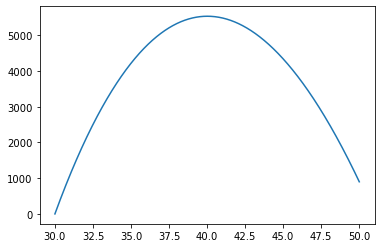

In [1147]:
plt.plot(r_domain, u)
# r_domain[-1]
u[-1]

899.8230985725276

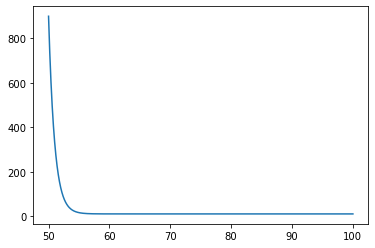

In [1148]:
plt.plot(out_domain, u_hat)
u_hat[0]

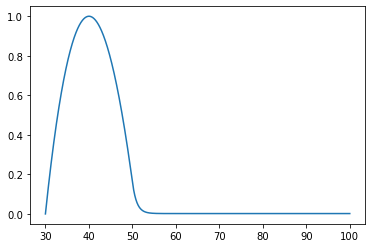

In [1150]:
velocity_profile = np.concatenate([u, u_hat])
radius_domain = np.concatenate([r_domain, out_domain])
plt.plot(radius_domain, velocity_profile/np.max(velocity_profile))

In [956]:
import sympy

In [1083]:
r_1, r_2, mu, mu_0, p_in, k, K_0, K_1, p_out = sympy.symbols('r_1, r_2, mu, mu_0, p_in, k, K_0, K_1, p_out')

In [1084]:
sympy.ln(r_2)

log(r_2)

In [1085]:
A = sympy.Matrix([[sympy.log(r_1), 1, 0], [sympy.log(r_2), 1, -K_0], [mu/r_2, 0, +(mu/mu_0)*K_1]])
A

Matrix([
[log(r_1), 1,           0],
[log(r_2), 1,        -K_0],
[  mu/r_2, 0, K_1*mu/mu_0]])

In [1086]:
b = sympy.Matrix([[(r_1**2/(4*mu))*p_in], [-k/(mu**2)*p_out+r_2**2/(4*mu)*p_in],[+r_2/2*p_in]])

In [1087]:
b

Matrix([
[                 p_in*r_1**2/(4*mu)],
[-k*p_out/mu**2 + p_in*r_2**2/(4*mu)],
[                         p_in*r_2/2]])

In [1088]:
x = sympy.simplify(A.inv()*b)

In [1089]:
C = x[0]
sympy.simplify(C)

-r_2*(-2*K_0*mu*mu_0*p_in*r_2 + K_1*mu*p_in*r_1**2 + K_1*(4*k*p_out - mu*p_in*r_2**2))/(4*mu**2*(K_0*mu_0 - K_1*r_2*log(r_1) + K_1*r_2*log(r_2)))

In [1090]:
D = x[1]
sympy.simplify(D)

(-2*K_0*mu*mu_0*p_in*r_2**2*log(r_1) + K_1*r_2*(4*k*p_out - mu*p_in*r_2**2)*log(r_1) + mu*p_in*r_1**2*(K_0*mu_0 + K_1*r_2*log(r_2)))/(4*mu**2*(K_0*mu_0 - K_1*r_2*log(r_1) + K_1*r_2*log(r_2)))

In [1091]:
c2 = x[2]
c2

mu_0*(4*k*p_out + mu*p_in*r_1**2 - 2*mu*p_in*r_2**2*(log(r_1) - log(r_2)) - mu*p_in*r_2**2)/(4*mu**2*(K_0*mu_0 - K_1*r_2*log(r_1) + K_1*r_2*log(r_2)))

In [560]:
A = np.array([[np.log(r1), 1], [np.log(r2), 1]])
A

array([[-6.90775528,  1.        ],
       [-6.2146081 ,  1.        ]])

In [223]:
b = np.array([[-dp_in/mu], [-dp_in/mu]])
b

array([[-1000.],
       [-1000.]])

In [224]:
np.array((np.linalg.inv(A)), dtype = np.longdouble)

array([[  4.48142012,  -4.48142012],
       [-19.63770232,  20.63770232]])

In [949]:
C_1 = dp_in/(4*mu)*(r2**2-r1**2)/np.log(r2/r1)
C_2 = dp_in/(4*mu)*r1**2-C_1*np.log(r1)

In [950]:
C_1

-0.0783046075588487

In [951]:
C_2

-0.11677661795426897

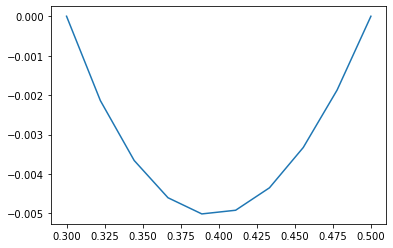

In [953]:
u = -dp_in/(4*mu)*(r_domain**2)+C_1*np.log(r_domain)+C_2
plt.plot(r_domain, u)